<a href="https://colab.research.google.com/github/Dantell12/Email-Classifier/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar Librerías y Cargar Datos**

In [ ]:
# Importar Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import plotly.express as px
import nltk #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from google.colab import drive
drive.mount('/content/drive') #Si se está usando jupyter comentar esta linea
# Definir rutas de los archivos CSV en Google Drive
filepath = '/content/drive/MyDrive/Inteligencia de Negocios/Proyecto H2/datasets/Dataet_Pishing_Spam_Email_sin_duplicados.csv'
    # Lee los archivos CSV en DataFrames de pandas
dataset_df = pd.read_csv(filepath)

print("DataFrame:")
print(dataset_df.head(10)); #Mostrar 10 primeras filas del dataset

Mounted at /content/drive
DataFrame:
                                                Body   Clasification  Label  \
0  re : 6 . 1100 , disc : uniformitarianism , re ...      Safe Email      0   
1  the other side of * galicismos * * galicismo *...      Safe Email      0   
2  re : equistar deal tickets are you still avail...      Safe Email      0   
3  \nHello I am your hot lil horny toy.\n    I am...  Phishing Email      2   
4  software at incredibly low prices ( 86 % lower...  Phishing Email      2   
5  global risk management operations sally congra...      Safe Email      0   
6  On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...      Safe Email      0   
7  entourage , stockmogul newsletter ralph velez ...  Phishing Email      2   
8  we owe you lots of money dear applicant , afte...  Phishing Email      2   
9  re : coastal deal - with exxon participation u...      Safe Email      0   

   text_size  
0       1030  
1        479  
2       1245  
3        688  
4        441  
5  

# Analisis de Datos Exploratorio

Mostrar el tamaño del conjunto de datos

In [ ]:
print(f"Tamaño del dataset: {dataset_df.shape}")

Tamaño del dataset: (16324, 4)


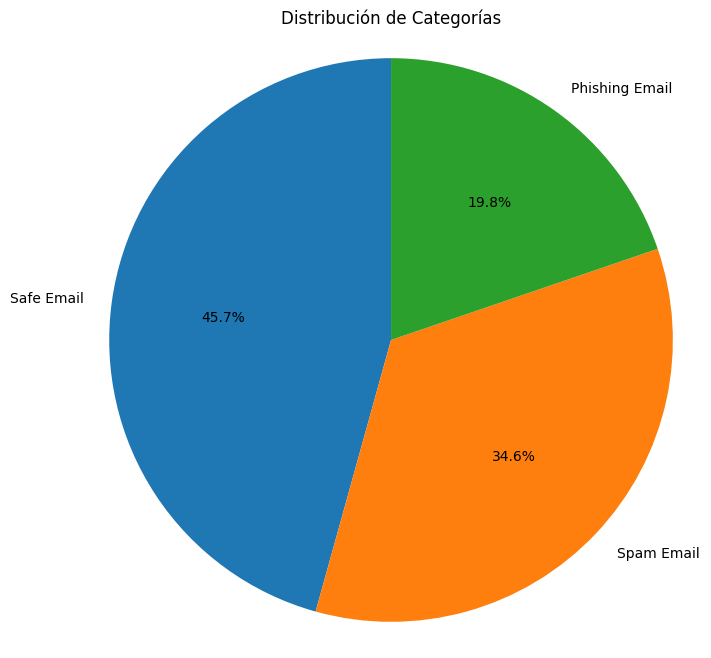

In [ ]:
# Contar la frecuencia de cada categoría en la columna 'Clasification'
category_counts = dataset_df['Clasification'].value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Categorías')
plt.axis('equal')
plt.show()

**Identificar variables categóricas y númericas**

In [ ]:
numericas = dataset_df.select_dtypes(include=[np.number]).columns.tolist()
categoricas = dataset_df.select_dtypes(include=[object]).columns.tolist()
print("Lista de Variables Numéricas:")
for v in numericas:
    print("  -", v)

print("\nLista de Variables String u Object:")
for v in categoricas:
    print("  -", v)

Lista de Variables Numéricas:
  - Label
  - text_size

Lista de Variables String u Object:
  - Body
  - Clasification


**Análisis de variables categóricas específicas**

In [ ]:
categorica_col = ["Clasification"]

print("\nLista de Variables Categóricas Analizadas:")
for col in categorica_col:
    print(f"Columna: {col}")
    print(f"Categorías únicas: {dataset_df[col].unique()}")
    print(f"Número de categorías: {dataset_df[col].nunique()}")
    print("-" * 80)


Lista de Variables Categóricas Analizadas:
Columna: Clasification
Categorías únicas: ['Safe Email' 'Phishing Email' 'Spam Email']
Número de categorías: 3
--------------------------------------------------------------------------------


**Variables numéricas restantes**

In [ ]:
numerica_col = [col for col in dataset_df.columns if col not in categorica_col and col in numericas]
print("\nLista de Variables Numéricas Restantes:")
for v in numerica_col:
    print("  -", v)



Lista de Variables Numéricas Restantes:
  - Label
  - text_size


**Detectar valores fuera de rango usando IQR**

In [ ]:
atipicos = {}
for col in dataset_df.select_dtypes(include=['number']).columns:
    Q1 = dataset_df[col].quantile(0.25)
    Q3 = dataset_df[col].quantile(0.75)
    IQR = Q3 - Q1
    min_val = Q1 - 1.5 * IQR
    max_val = Q3 + 1.5 * IQR
    fuera_de_rango = dataset_df[(dataset_df[col] < min_val) | (dataset_df[col] > max_val)][col]
    if not fuera_de_rango.empty:
        atipicos[col] = fuera_de_rango

# Mostrar valores atípicos
if atipicos:
    for var, rows in atipicos.items():
        print(f"\nValores atípicos en la variable '{var}':")
        print(rows.to_list())
else:
    print("\nNo se encontraron valores atípicos.")


Valores atípicos en la variable 'text_size':
[3295, 7653, 5900, 3017, 9937, 3701, 5486, 2998, 2670, 3219, 4088, 4783, 2757, 2866, 6985, 7402, 3151, 2898, 5034, 3262, 7496, 2807, 5281, 6111, 3812, 3780, 3003, 2825, 3445, 4525, 3123, 6508, 4675, 2753, 3215, 3488, 2865, 3941, 6990, 3433, 4459, 6638, 3389, 4026, 7044, 9488, 3205, 3548, 10260, 7124, 18091, 5176, 2717, 5161, 2978, 3238, 4649, 3262, 3628, 4237, 3227, 7565, 2719, 16351, 16999, 3586, 4428, 3079, 2688, 3728, 12117, 3566, 5930, 3500, 7736, 3492, 5091, 4788, 9525, 4576, 3255, 3033, 47521, 2804, 4453, 5473, 9572, 43807, 5180, 4093, 10227, 3875, 2796, 3740, 5976, 11760, 14171, 4169, 2845, 9024, 2763, 7459, 6374, 3601, 2833, 2734, 5570, 3478, 2967, 2998, 4020, 2934, 10735, 4162, 3548, 3217, 2898, 19704, 3433, 4427, 2740, 2882, 7177, 4059, 6026, 2858, 3570, 8626, 11557, 7254, 5342, 3822, 3050, 3073, 2661, 3596, 3486, 4847, 2797, 3730, 2911, 4335, 2797, 5915, 3361, 6300, 7278, 8108, 23440, 4550, 7748, 11388, 2909, 2786, 2959, 85139, 2

## Resumen descriptivo del conjunto de datos

In [ ]:
dataset_df.describe(include="all")

,Body,Clasification,Label,text_size
count,16323,16324,16324.000000,16324.000000
unique,16322,3,NaN,NaN
top,empty,Safe Email,NaN,NaN
freq,2,7458,NaN,NaN
mean,NaN,NaN,0.740689,1088.843850
std,NaN,NaN,0.766309,2719.512024
min,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,0.000000,104.000000
50%,NaN,NaN,1.000000,428.000000
75%,NaN,NaN,1.000000,1126.000000


**Interpretación**
*   Hay 3 categorías en la columna Clasification ("Safe Email", "Phishing Email" y "Spam Email").
*   La categoría más común es "Safe Email" con 7,458 apariciones, lo que sugiere que el dataset contiene más correos legítimos que maliciosos.
*   Hay 16,322 textos únicos en la columna Body, lo que implica que casi todos los correos tienen contenido distinto.
*   El promedio de Label es 0.54, lo que indica que hay una ligera mayoría de correos clasificados como maliciosos (1) en comparación con los seguros (0).
*   La desviación estándar de 0.49 sugiere una distribución bastante equilibrada entre ambos tipos de correos.

**Calcular estadísticas de variables numéricas**

In [ ]:
for col in numerica_col:
    stats = {
        'mean': dataset_df[col].mean(),
        'median': dataset_df[col].median(),
        'std_dev': dataset_df[col].std(),
        'min': dataset_df[col].min(),
        'max': dataset_df[col].max(),
        '25th_percentile': np.percentile(dataset_df[col], 25),
        '75th_percentile': np.percentile(dataset_df[col], 75),
    }
    print(f"\nEstadísticas de '{col}':")
    for stat, value in stats.items():
        print(f"{stat}: {value}")


Estadísticas de 'Label':
mean: 0.7406885567262925
median: 1.0
std_dev: 0.7663085124005448
min: 0
max: 2
25th_percentile: 0.0
75th_percentile: 1.0

Estadísticas de 'text_size':
mean: 1088.8438495466798
median: 428.0
std_dev: 2719.5120244906457
min: 0
max: 129635
25th_percentile: 104.0
75th_percentile: 1126.0


**Estadísticas de variables categóricas**

In [ ]:
def categorical_statistics(df, cols):
    stats = {
        'Variable': [],
        'Valores Unicos': [],
        'Valor más común': [],
        'Frecuencia del Valor más común': []
    }

    for col in cols:
        stats['Variable'].append(col)
        stats['Valores Unicos'].append(df[col].nunique())
        most_freq_value = df[col].mode()[0]
        stats['Valor más común'].append(most_freq_value)
        stats['Frecuencia del Valor más común'].append(df[col].value_counts().max())

    return pd.DataFrame(stats)

# Calcular estadísticas
stats_df = categorical_statistics(dataset_df, categorica_col)
print("\nEstadísticas de Variables Categóricas:")
print(stats_df)




Estadísticas de Variables Categóricas:
        Variable  Valores Unicos Valor más común  \
0  Clasification               3      Safe Email   

   Frecuencia del Valor más común  
0                            7458  


**Histograma para la distribución del tamaño de texto**

In [ ]:
# Crear el histograma para la distribución de tamaños de texto
fig = px.histogram(dataset_df, x='text_size', marginal='rug',
                   title='Distribución de la Longitud del Texto')

# Configuración de los ejes
fig.update_layout(
    xaxis_title='Longitud del Texto',
    yaxis_title='Frecuencia',
    showlegend=True
)

fig.show()

**Histograma para la distribución del tamaño de texto por categoría**

In [ ]:
# Crear el histograma para la distribución de tamaños de texto por categoría
fig = px.histogram(dataset_df, x='text_size' ,color='Clasification', marginal='rug',
                   title='Distribución de la Longitud del Texto por Categoría')

# Configuración de los ejes
fig.update_layout(
    xaxis_title='Longitud del Texto',
    yaxis_title='Frecuencia',
    showlegend=True
)

fig.show()

## Diagramas de Caja

**Crear diagramas de cajas para variables numéricas**

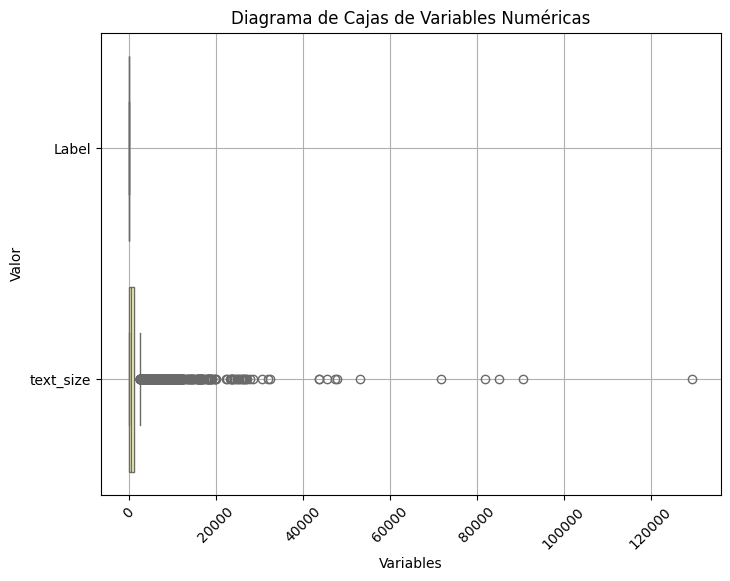

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset_df[numerica_col], orient='h', palette='Set3')
plt.title('Diagrama de Cajas de Variables Numéricas')
plt.ylabel('Valor')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Diagrama de caja por variable.**

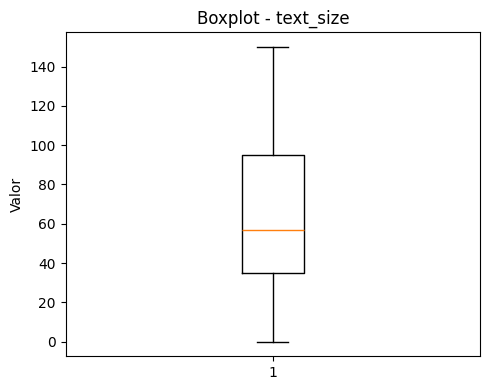

In [ ]:
# Definir las variables numéricas y sus límites máximos
numericas = ['text_size']  #
max_values = [150]  # Establecer un valor máximo correspondiente para cada variable

# Crear los diagramas de cajas
plt.figure(figsize=(5, 4))

for i, var in enumerate(numericas, 1):
    plt.subplot(1, len(numericas), i)
    # Filtrar datos para excluir valores extremos
    df_filtered = dataset_df[dataset_df[var] <= max_values[i - 1]]
    # Crear boxplot
    plt.boxplot(df_filtered[var])
    plt.title(f'Boxplot - {var}')
    plt.ylabel('Valor')

plt.tight_layout()
plt.show()


## Word Cloud : Spam vs Phishing vs Safe

Word Cloud de Spam

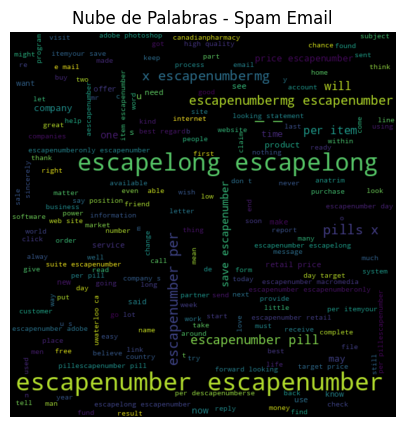

In [ ]:
from wordcloud import WordCloud

# Filtrar solo las filas de Spam Email
subset = dataset_df[dataset_df['Clasification'] == 'Spam Email']
text = ' '.join(subset['Body'])

# Crear la nube de palabras
wordcloud = WordCloud(width=550, height=550, background_color='black').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de Palabras - Spam Email')
plt.axis('off')
plt.show()


Word Cloud de Phishing

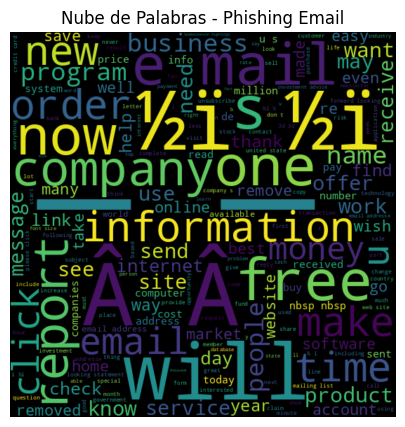

In [ ]:
# Filtrar solo las filas de pHISHING Email
SUB = dataset_df[dataset_df['Clasification'] == 'Phishing Email']
# Convert the 'Body' column to strings before joining
text = ' '.join(SUB['Body'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(width=550, height=550, background_color='black').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de Palabras - Phishing Email')
plt.axis('off')
plt.show()

Word Cloud de Safe

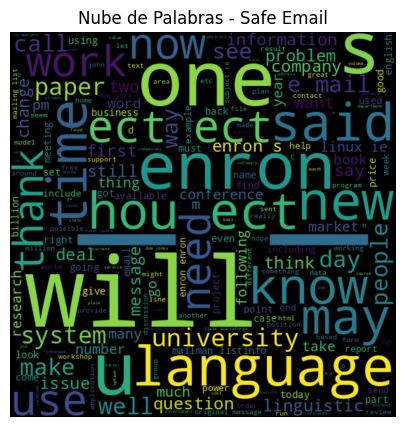

In [ ]:
from wordcloud import WordCloud

# Filtrar solo las filas de Spam Email
subset = dataset_df[dataset_df['Clasification'] == 'Safe Email']
text = ' '.join(subset['Body'])

# Crear la nube de palabras
wordcloud = WordCloud(width=550, height=550, background_color='black').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de Palabras - Safe Email')
plt.axis('off')
plt.show()


# **Preparación de los datos**

**Tipos de datos según Pandas**

In [ ]:
# Mostrar tipos de datos
print("Tipos de datos en el dataset:")
print(dataset_df.dtypes)


Tipos de datos en el dataset:
Body             object
Clasification    object
Label             int64
text_size         int64
dtype: object


**Asegurarse de que las etiquetas sean númericas**

In [ ]:
# Mapear las etiquetas a valores numéricos
dataset_df['Label'] = dataset_df['Clasification'].map({'Safe Email': 0, 'Spam Email': 1, 'Phishing Email': 2})

print(dataset_df.head());

                                                Body   Clasification  Label  \
0  re : 6 . 1100 , disc : uniformitarianism , re ...      Safe Email      0   
1  the other side of * galicismos * * galicismo *...      Safe Email      0   
2  re : equistar deal tickets are you still avail...      Safe Email      0   
3  \nHello I am your hot lil horny toy.\n    I am...  Phishing Email      2   
4  software at incredibly low prices ( 86 % lower...  Phishing Email      2   

   text_size  
0       1030  
1        479  
2       1245  
3        688  
4        441  


## **Verificar duplicados**

In [ ]:
# Verificar duplicados
duplicados = dataset_df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


In [ ]:
# Eliminar filas duplicadas
dataset_df = dataset_df.drop_duplicates()

# Verificar de nuevo el número de duplicados
duplicados = dataset_df.duplicated().sum()
print(f"Número de filas duplicadas después de eliminarlas: {duplicados}")

# Guardar el dataset combinado sin duplicados
output_file = '/content/drive/MyDrive/Inteligencia de Negocios/Proyecto H2/datasets/Dataet_Pishing_Spam_Email_sin_duplicados.csv'
dataset_df.to_csv(output_file, index=False)
print(f"Archivo combinado sin duplicados guardado en: {output_file}")

Número de filas duplicadas después de eliminarlas: 0
Archivo combinado sin duplicados guardado en: /content/drive/MyDrive/Inteligencia de Negocios/Proyecto H2/datasets/Dataet_Pishing_Spam_Email_sin_duplicados.csv


In [ ]:
# Eliminar filas con valores NaN o vacíos en 'Body'
initial_size = dataset_df.shape[0]
dataset_df.dropna(subset=['Body'], inplace=True)
dataset_df = dataset_df[dataset_df['Body'] != '']
final_size = dataset_df.shape[0]

# Calcular y mostrar la cantidad de filas eliminadas
deleted_rows = initial_size - final_size
print(f"Se eliminaron {deleted_rows} filas con valores vacíos o nulos.")

# Imprimir el nuevo tamaño del DataFrame
print(f"Nuevo tamaño del dataset: {dataset_df.shape}")

Se eliminaron 1 filas con valores vacíos o nulos.
Nuevo tamaño del dataset: (16323, 4)


**Verificar valores únicos por cada variable y eliminar columnas constantes**

In [ ]:
print("\nValores únicos por columna:")
uniques = dataset_df.nunique(axis=0)
print(uniques)

dataset_df = dataset_df.loc[:, dataset_df.nunique() > 1]
print(f"\nEl DataFrame tiene {dataset_df.shape[0]} registros y {dataset_df.shape[1]} columnas o variables después de eliminar columnas constantes.")


Valores únicos por columna:
Body             16322
Clasification        3
Label                3
text_size         3608
dtype: int64

El DataFrame tiene 16323 registros y 4 columnas o variables después de eliminar columnas constantes.


# **Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Crear el vectorizador de palabras
count = CountVectorizer()
# Ajustar el vectorizador al texto de tu dataset y transformarlo en una matriz de frecuencia
text = count.fit_transform(dataset_df['Body'])
# Separar en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(text, dataset_df['Label'], test_size=0.30, random_state=100)
# Mostrar la matriz de características
text

<16323x122737 sparse matrix of type '<class 'numpy.int64'>'
	with 1448367 stored elements in Compressed Sparse Row format>

In [ ]:
print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Valores únicos en y_train:", y_train.unique())  # Debe imprimir [0, 1, 2]
print("Valores únicos en y_test:", y_test.unique())    # Debe imprimir [0, 1, 2]


Dimensiones de x_train: (11426, 122737)
Dimensiones de x_test: (4897, 122737)
Valores únicos en y_train: [1 2 0]
Valores únicos en y_test: [1 2 0]


# Entrenamiento de Modelos

## ***MLP Classifier***
El MLP es una red neuronal artificial que consiste en múltiples capas de nodos (neuronas). Usa una combinación de pesos y funciones de activación para aprender patrones complejos en los datos. En la clasificación de correos, MLP puede detectar relaciones no lineales en los textos y aprender representaciones abstractas de los correos electrónicos, lo que le permite diferenciar entre Safe, Spam y Phishing con buena precisión. Sin embargo, requiere más datos y recursos computacionales para entrenarse de manera efectiva.



In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp_classifier_model.fit(x_train, y_train)

prediction = mlp_classifier_model.predict(x_test)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction, average='macro')))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction, average='macro')))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction, average='macro')))

MLP Classifier
Accuracy score: 0.78
Precision score: 0.77
Recall score: 0.73
F1 score: 0.74
CPU times: user 23min 8s, sys: 30min 31s, total: 53min 40s
Wall time: 47min 16s


## ***Multinomial Naive Bayes***
Este modelo es una variante del Naïve Bayes diseñada para datos discretos, como texto representado mediante frecuencias de palabras. En el contexto de la clasificación de correos electrónicos, MNB es útil porque asume que las palabras aparecen con una cierta probabilidad en cada clase (Safe, Spam o Phishing), lo que permite una clasificación eficiente. Su rapidez y buen desempeño en problemas de texto lo hacen una opción popular para el filtrado de spam.

In [ ]:
%%time
# Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)

print("Multinomial NB")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction, average='macro')))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction, average='macro')))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction, average='macro')))

Multinomial NB
Accuracy score: 0.79
Precision score: 0.76
Recall score: 0.78
F1 score: 0.77
CPU times: user 133 ms, sys: 13.2 ms, total: 146 ms
Wall time: 150 ms


## ***Bernoulli Naive Bayes***
Este modelo es otra variante de Naïve Bayes que asume que las características siguen una distribución de Bernoulli (presencia o ausencia de palabras). A diferencia de MNB, que se basa en frecuencias, BNB se centra en la presencia o ausencia de palabras clave en los correos electrónicos. Funciona bien en problemas donde ciertas palabras específicas pueden ser determinantes para la clasificación (por ejemplo, "gratis", "urgente" o "contraseña" en correos de phishing).



In [ ]:
%%time
# Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)


#Evaluation
print("Bernoulli NB")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction, average='macro')))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction, average='macro')))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction, average='macro')))

Bernoulli NB
Accuracy score: 0.69
Precision score: 0.67
Recall score: 0.61
F1 score: 0.62
CPU times: user 89.6 ms, sys: 0 ns, total: 89.6 ms
Wall time: 94.8 ms


## ***Support Vector Classifier***
El modelo SVC es una implementación del algoritmo de Máquinas de Vectores de Soporte (SVM). Este clasificador busca encontrar un hiperplano óptimo que separe las clases en el espacio vectorial, maximizando la distancia entre los puntos más cercanos de cada categoría. Para la clasificación de correos electrónicos, SVC puede ser eficaz cuando las características del texto permiten una separación clara entre Safe, Spam y Phishing. Es particularmente útil si los datos no son linealmente separables, ya que puede utilizar kernels para transformar el espacio de características.

In [ ]:
%%time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(x_train, y_train)  # Entrenar el modelo

svm_prediction = svm_model.predict(x_test)

print("SVC Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, svm_prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, svm_prediction, average='macro')))
print("Recall score: {:.2f}".format(recall_score(y_test, svm_prediction, average='macro')))
print("F1 score: {:.2f}".format(f1_score(y_test, svm_prediction, average='macro')))
print("\n")


SVC Classifier
Accuracy score: 0.73
Precision score: 0.74
Recall score: 0.67
F1 score: 0.68


CPU times: user 8min 24s, sys: 2.87 s, total: 8min 27s
Wall time: 8min 34s


## ***Random Forest***
Este modelo es un conjunto de múltiples árboles de decisión, donde cada árbol contribuye a la predicción final mediante un sistema de votación. Es resistente al sobreajuste y funciona bien con características de texto vectorizadas. En la clasificación de correos electrónicos, Random Forest puede identificar patrones complejos en los correos que ayudan a diferenciarlos en las tres categorías. Su ventaja es la estabilidad y precisión, aunque puede ser más costoso computacionalmente.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)  # Entrenar el modelo

rf_prediction = random_forest_model.predict(x_test)

print("Random Forest Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, rf_prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, rf_prediction, average='macro')))
print("Recall score: {:.2f}".format(recall_score(y_test, rf_prediction, average='macro')))
print("F1 score: {:.2f}".format(f1_score(y_test, rf_prediction, average='macro')))


Random Forest Classifier
Accuracy score: 0.81
Precision score: 0.78
Recall score: 0.74
F1 score: 0.75


## ***XGBoost***
XGBoost es un algoritmo de boosting basado en árboles de decisión, conocido por su alta eficiencia y precisión en tareas de clasificación. Se entrena iterativamente, mejorando los errores de los modelos anteriores, lo que lo hace más robusto en comparación con otros modelos de árboles. Para la clasificación de correos electrónicos, XGBoost puede manejar relaciones complejas entre palabras y clases, proporcionando predicciones precisas. Es una excelente opción si se dispone de suficientes datos y recursos computacionales.

In [ ]:
%%time
from xgboost import XGBClassifier

# Crear y entrenar el modelo XGBoost
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", max_depth=6, n_estimators=100)
xgb_classifier.fit(x_train, y_train)

# Predicción en datos de prueba
xgb_prediction = xgb_classifier.predict(x_test)

# Calcular y mostrar métricas de clasificación
print("XGBoost Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, xgb_prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, xgb_prediction, average='macro')))
print("Recall score: {:.2f}".format(recall_score(y_test, xgb_prediction, average='macro')))
print("F1 score: {:.2f}".format(f1_score(y_test, xgb_prediction, average='macro')))


XGBoost Classifier
Accuracy score: 0.83
Precision score: 0.80
Recall score: 0.80
F1 score: 0.80
CPU times: user 1min 48s, sys: 369 ms, total: 1min 48s
Wall time: 1min 6s


## ***Logistic Regression***
A pesar de su nombre, la Regresión Logística es un modelo de clasificación lineal que estima la probabilidad de pertenencia a una clase mediante una función sigmoide. Para el filtrado de correos electrónicos, este modelo puede funcionar bien si las categorías de Safe, Spam y Phishing pueden separarse mediante una combinación lineal de las características. Es un modelo rápido y simple que sirve como una buena línea base para comparar con modelos más complejos.



In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
logistic_model.fit(x_train, y_train)

# Predicción en datos de prueba
logistic_prediction = logistic_model.predict(x_test)

# Calcular y mostrar métricas de clasificación
print("Logistic Regression")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, logistic_prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, logistic_prediction, average='macro')))
print("Recall score: {:.2f}".format(recall_score(y_test, logistic_prediction, average='macro')))
print("F1 score: {:.2f}".format(f1_score(y_test, logistic_prediction, average='macro')))


Logistic Regression
Accuracy score: 0.82
Precision score: 0.79
Recall score: 0.78
F1 score: 0.79
CPU times: user 1min 49s, sys: 24.1 s, total: 2min 13s
Wall time: 1min 22s


## ***K-Nearest Neighbors***
Este algoritmo clasifica un correo en función de sus "vecinos" más cercanos en el espacio de características. Si un correo es más similar a otros correos etiquetados como Spam, lo clasificará como tal. KNN puede ser efectivo si los datos tienen una distribución clara y las características de texto están bien representadas. Sin embargo, puede ser lento en grandes volúmenes de datos, ya que requiere calcular distancias con todos los puntos en el conjunto de entrenamiento.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Crear y entrenar el modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos según sea necesario
knn_model.fit(x_train, y_train)

# Predicción en datos de prueba
knn_prediction = knn_model.predict(x_test)

# Calcular y mostrar métricas de clasificación
print("K-Nearest Neighbors")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, knn_prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, knn_prediction, average='macro')))
print("Recall score: {:.2f}".format(recall_score(y_test, knn_prediction, average='macro')))
print("F1 score: {:.2f}".format(f1_score(y_test, knn_prediction, average='macro')))

K-Nearest Neighbors
Accuracy score: 0.69
Precision score: 0.70
Recall score: 0.63
F1 score: 0.64


# **Comparación de Modelos**

## **Matriz de Confusión**

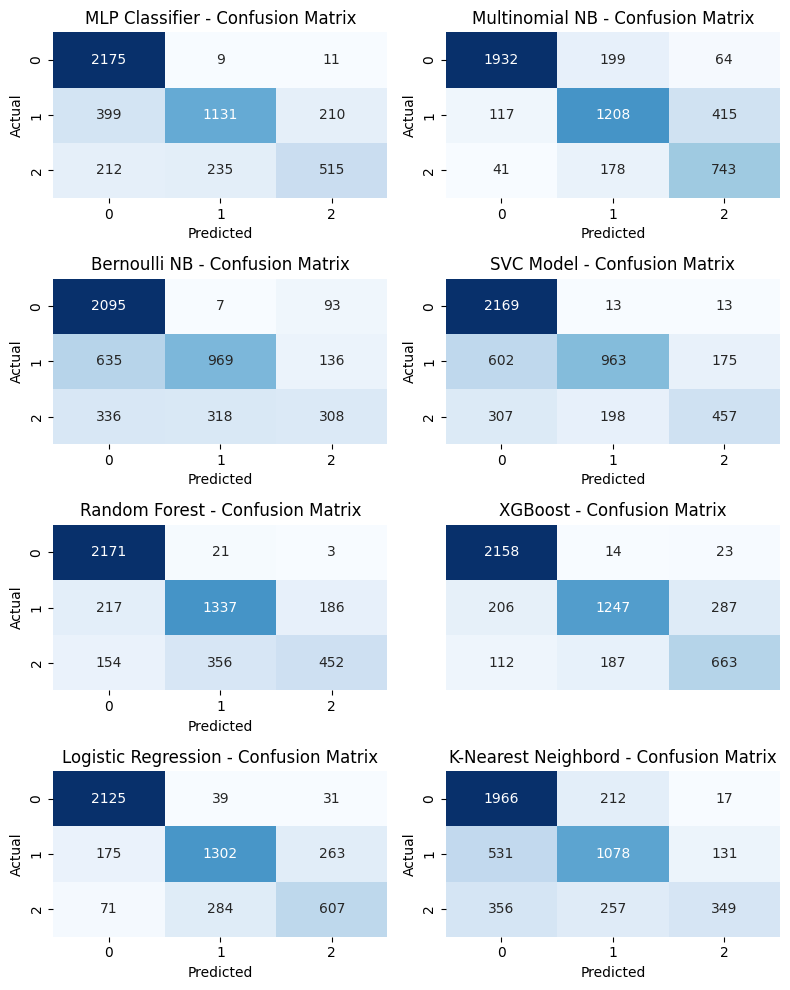

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = [
    ('MLP Classifier', mlp_classifier_model),
    ("Multinomial NB", multinomial_nb_model),
    ("Bernoulli NB", bernoulli_nb_model),
    ('SVC Model', svm_model),
    ('Random Forest', random_forest_model),
    ('XGBoost', xgb_classifier),
    ('Logistic Regression', logistic_model),
    ('K-Nearest Neighbord', knn_model)
]

# Crear una figura con 3 filas y 2 columnas
fig, axes = plt.subplots(4, 2, figsize=(8, 10))

for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)

    row, col = divmod(i, 2)  # Obtiene la fila y columna para cada matriz
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[row, col])
    axes[row, col].set_title(f"{model_name} - Confusion Matrix")
    axes[row, col].set_xlabel("Predicted")
    axes[row, col].set_ylabel("Actual")

# Ocultar el último subplot vacío (posición 3,2)
axes[2, 1].axis("off")

plt.tight_layout()
plt.show()


### **Interpretación**
*   Las matrices de confusión muestran que XGBoost y Random Forest son los modelos más efectivos, logrando clasificar correctamente las tres categorías (correos legítimos, spam y phishing) con pocas confusiones. Ambos tienen un desempeño balanceado, especialmente en phishing, que suele ser más difícil de clasificar. Por otro lado, Bernoulli NB y KNN tienen el peor rendimiento, con numerosas confusiones, especialmente entre spam y phishing, lo que los hace menos adecuados para este problema. Modelos como Logistic Regression y Multinomial NB ofrecen un buen equilibrio, pero no alcanzan la precisión de XGBoost.


---


**Conclusión**

XGBoost es el modelo más robusto y confiable para esta tarea, seguido de cerca por Random Forest. Estos modelos son recomendados por su capacidad de clasificar correctamente incluso las categorías más complejas.


## **Mapa de calor de comparación de métricas**

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

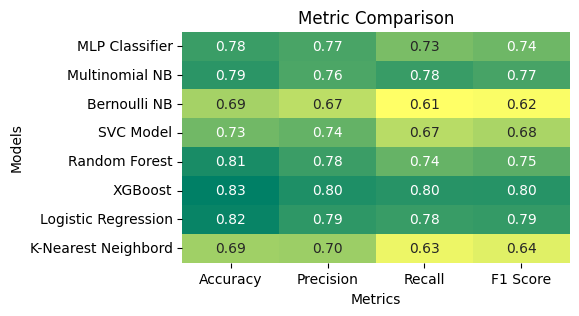

In [ ]:
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='macro')
    recall = recall_score(y_test, prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    metric_data.append([accuracy, precision, recall, f1])

metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Heatmap para comparación de métricas
plt.figure(figsize=(5, 3))
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r",
            xticklabels=metric_labels,
            yticklabels=[model_name for model_name, _ in models])

plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout


### **Interpretación**
*   XGBoost es el modelo con mejor rendimiento general, destacando con un Accuracy de 0.83 y un F1 Score de 0.80, lo que lo hace ideal para la clasificación de correos. Le siguen de cerca Logistic Regression y Random Forest, ambos con un desempeño consistente y confiable. Por otro lado, Bernoulli Naive Bayes y K-Nearest Neighbor muestran el rendimiento más bajo, siendo menos efectivos para esta tarea. En general, XGBoost lidera como la opción más eficaz, especialmente en problemas complejos como el phishing.

---
**Conclusión**

XGBoost es el modelo más eficaz para clasificar correos maliciosos en este conjunto de datos, seguido de cerca por Logistic Regression y Random Forest. Los modelos Bernoulli Naive Bayes y K-Nearest Neighbor tienen el peor desempeño, por lo que no son recomendables para esta tarea.


## **Curva Roc**

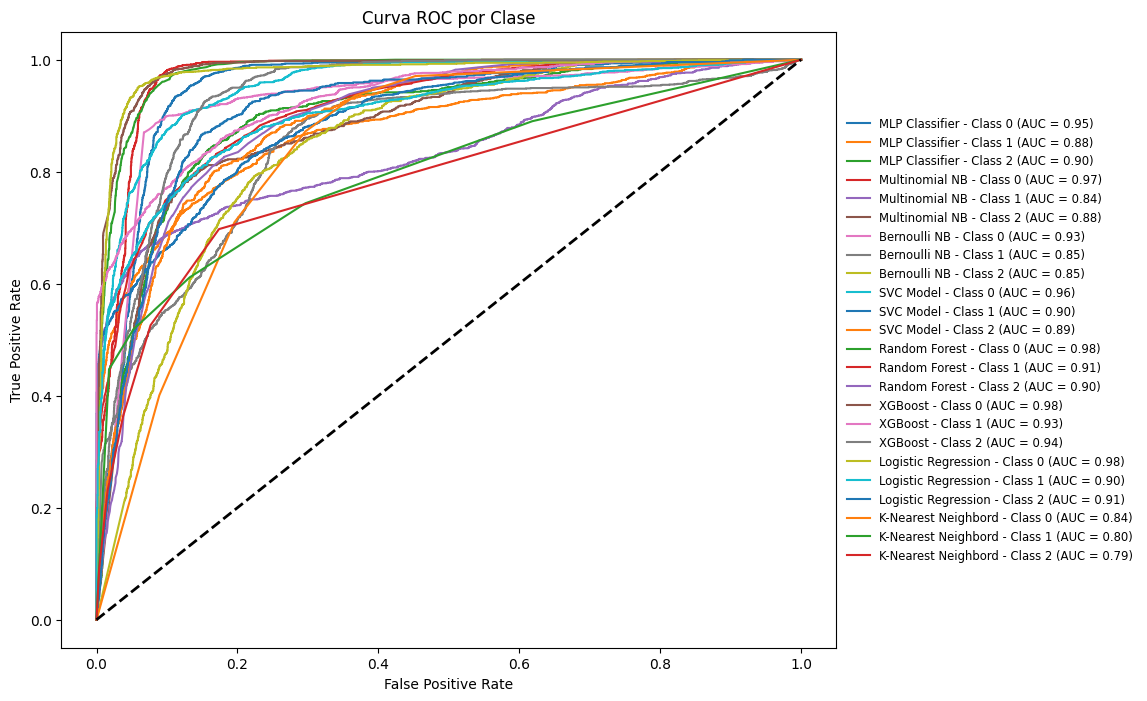

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas para multiclase
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Calcular la curva ROC y el AUC para cada clase
plt.figure(figsize=(10, 8))
for i, (model_name, model) in enumerate(models):
    y_score = model.predict_proba(x_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_score[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])
        plt.plot(fpr[j], tpr[j], label=f'{model_name} - Class {j} (AUC = {roc_auc[j]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC por Clase')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', frameon=False)
plt.show()

### **Interpretación**


*   Random Forest, XGBoost y Logistic Regression tienen los valores de AUC más altos (0.98 para la clase 0 y 0.90-0.94 para las otras clases), lo que indica que son los mejores modelos en términos de separación de clases.

*   SVC y Multinomial Naïve Bayes también presentan un buen rendimiento (0.96 - 0.97 en la clase 0, pero valores más bajos en las otras clases, especialmente en la clase 2).

*   MLP Classifier y Bernoulli Naïve Bayes tienen un desempeño intermedio, con valores de AUC entre 0.85 y 0.95 dependiendo de la clase.

*   K-Nearest Neighbors muestra los valores de AUC más bajos, especialmente para la clase 2 (0.79), lo que indica que tiene más dificultad para distinguir correctamente esta clase.



---

**Conclusión**

Los modelos con mejor desempeño en la discriminación de clases son Random Forest, XGBoost y Logistic Regression, lo que los convierte en las mejores opciones si se busca un modelo robusto y preciso.


## **Curva de Precisión-Recall**

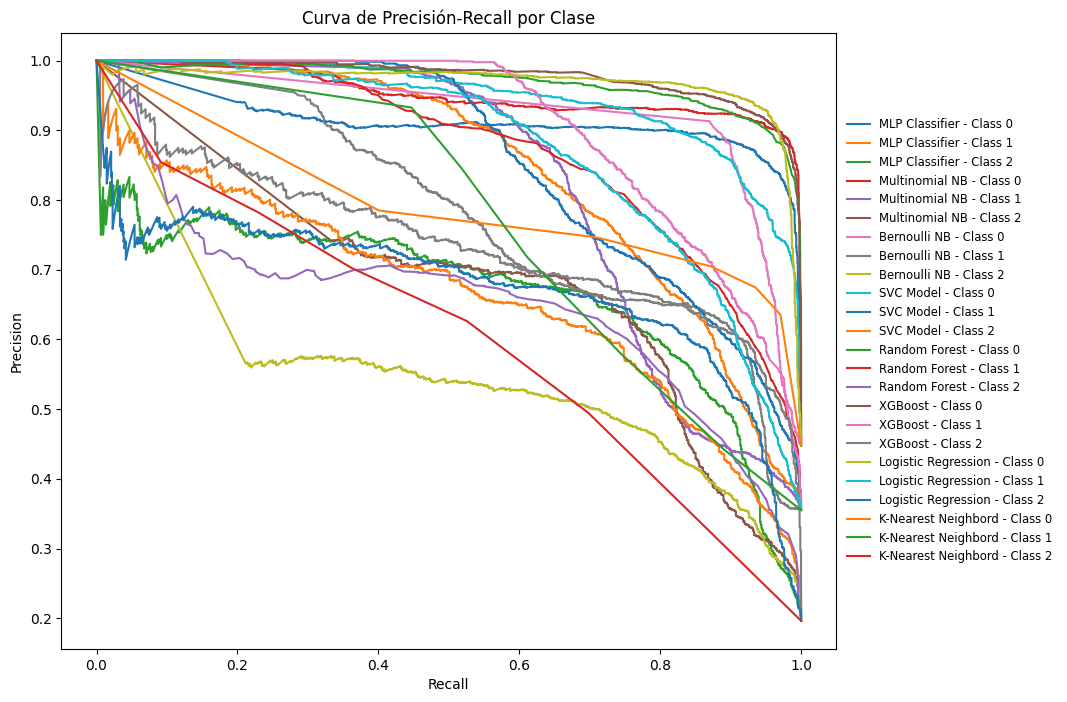

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))
for i, (model_name, model) in enumerate(models):
    y_score = model.predict_proba(x_test)
    precision = dict()
    recall = dict()
    for j in range(n_classes):
        precision[j], recall[j], _ = precision_recall_curve(y_test_bin[:, j], y_score[:, j])
        plt.plot(recall[j], precision[j], label=f'{model_name} - Class {j}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall por Clase')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', frameon=False)
plt.show()

### **Interpretación**


*   Random Forest, XGBoost y Logistic Regression presentan las mejores curvas de Precisión-Recall, manteniendo una alta precisión incluso cuando el recall aumenta, lo que indica que son modelos confiables en términos de equilibrio entre ambos parámetros.

*   Multinomial Naïve Bayes y SVC muestran un rendimiento intermedio, con una buena precisión inicial, pero con una caída más pronunciada a medida que el recall aumenta.

*   MLP Classifier y Bernoulli Naïve Bayes tienen un desempeño variable, con buenas curvas en algunas clases, pero una caída de precisión más notoria en otras.

*   K-Nearest Neighbors tiene la peor curva para la clase 2, mostrando una disminución significativa de precisión a medida que se intenta aumentar el recall, lo que indica que tiene dificultades para clasificar correctamente esta clase.


---

**Conclusión**

Los modelos más efectivos en términos de equilibrio entre precisión y recall son Random Forest, XGBoost y Logistic Regression, lo que los hace adecuados para detectar tanto correos maliciosos como seguros sin comprometer demasiado la precisión. Sin embargo, la clase 2 (probablemente Phishing) sigue siendo la más difícil de clasificar correctamente, especialmente para K-Nearest Neighbors.



## **Gráfica de Métricas por Modelo**

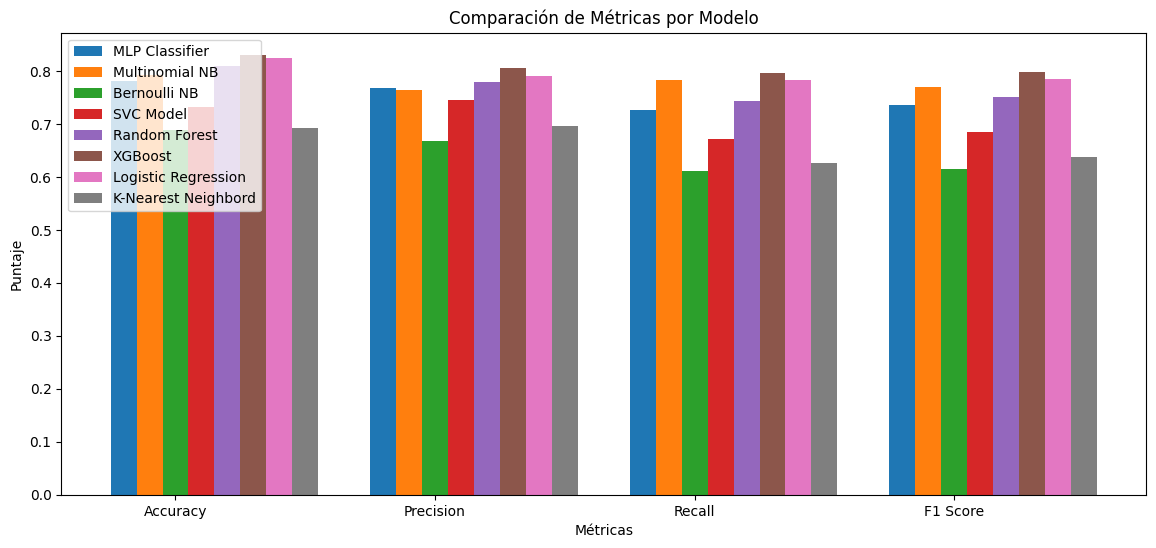

In [ ]:
# Crear un gráfico de barras para comparar métricas
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(metric_labels))
width = 0.1

plt.figure(figsize=(14, 6))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='macro')
    recall = recall_score(y_test, prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    metrics = [accuracy, precision, recall, f1]
    plt.bar(x + i * width, metrics, width, label=model_name)

plt.xlabel('Métricas')
plt.ylabel('Puntaje')
plt.title('Comparación de Métricas por Modelo')
plt.xticks(x + width * 2, metric_labels)
plt.legend(loc="upper left")
plt.show()

### **Interpretación**
El MLP Classifier destaca como el modelo más confiable, sobresaliendo en precisión, recall y F1 Score. Random Forest se posiciona como una alternativa robusta, aunque ligeramente inferior. SVM ofrece un desempeño intermedio, destacando en precisión pero con menor recall. Multinomial NB mantiene un buen equilibrio, adecuado para escenarios con recursos limitados. Bernoulli NB muestra el desempeño más bajo en todas las métricas, especialmente en la clase phishing.

## **Tabla de resultados de las metricas**

In [ ]:
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='macro')
    recall = recall_score(y_test, prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    metric_data.append([model_name, accuracy, precision, recall, f1])

# Create DataFrame
df_metrics = pd.DataFrame(metric_data, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Display DataFrame
df_metrics


,Model,Accuracy,Precision,Recall,F1 Score
0,MLP Classifier,0.780274,0.767654,0.725410,0.735359
1,Multinomial NB,0.792934,0.764856,0.782261,0.769590
2,Bernoulli NB,0.688585,0.668566,0.610502,0.615376
3,SVC Model,0.732898,0.744493,0.672218,0.684130
4,Random Forest,0.808658,0.779749,0.742437,0.751577
5,XGBoost,0.830713,0.804718,0.796333,0.797193
6,Logistic Regression,0.823770,0.790391,0.782454,0.785426
7,K-Nearest Neighbord,0.692873,0.696048,0.625999,0.637750


## **Reporte de Clasificación**

In [ ]:
from sklearn.metrics import classification_report

for model_name, model in models:
    prediction = model.predict(x_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, prediction, target_names=["Safe Email", "Spam Email", "Phishing Email"]))
    print("\n" + "="*50 + "\n")

Classification Report for MLP Classifier:
                precision    recall  f1-score   support

    Safe Email       0.78      0.99      0.87      2195
    Spam Email       0.82      0.65      0.73      1740
Phishing Email       0.70      0.54      0.61       962

      accuracy                           0.78      4897
     macro avg       0.77      0.73      0.74      4897
  weighted avg       0.78      0.78      0.77      4897



Classification Report for Multinomial NB:
                precision    recall  f1-score   support

    Safe Email       0.92      0.88      0.90      2195
    Spam Email       0.76      0.69      0.73      1740
Phishing Email       0.61      0.77      0.68       962

      accuracy                           0.79      4897
     macro avg       0.76      0.78      0.77      4897
  weighted avg       0.80      0.79      0.80      4897



Classification Report for Bernoulli NB:
                precision    recall  f1-score   support

    Safe Email       0.68

### **Interpretación**

# **¿Cuál es el mejor modelo?**

In [ ]:
# Calcular un score global ponderado
weights = [0.25, 0.25, 0.25, 0.25]  # Pesos para Accuracy, Precision, Recall, F1
best_model = None
best_score = -1

for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='macro')
    recall = recall_score(y_test, prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    weighted_score = (accuracy * weights[0] + precision * weights[1] + recall * weights[2] + f1 * weights[3])

    if weighted_score > best_score:
        best_score = weighted_score
        best_model = model_name

print(f"El mejor modelo es: {best_model} con un score ponderado de {best_score:.2f}")

El mejor modelo es: XGBoost con un score ponderado de 0.81


### **Resultado**
Con base en las métricas analizadas, la mejor opción es XGBoost, que obtuvo un score ponderado de 0.81. Este modelo mostró un desempeño sólido en términos de precisión, recall y F1-score, logrando el mejor equilibrio general en la clasificación de correos electrónicos.

**Principales razones para elegir XGBoost:**
*   Mayor Accuracy (0.83), lo que indica una alta tasa de predicciones correctas.
*   Buen equilibrio entre precisión (0.80) y recall (0.80), asegurando una correcta clasificación de correos seguros, spam y phishing.
*   Mejor desempeño en la separación de clases, lo que sugiere que maneja bien las diferencias entre los tipos de correos.


## **Serializar el mejor modelo**

In [ ]:
import joblib
# Guardar modelo y vectorizador
joblib.dump(xgb_classifier, "xgboost_classifier_model.pkl")
joblib.dump(count, "vectorizer.pkl")

print("Modelo y vectorizador guardados exitosamente.")

Modelo y vectorizador guardados exitosamente.


## **Cargar el modelo y clasificar correos manualmente**

In [ ]:
import joblib
# Cargar el modelo entrenado
mlp_classifier_model = joblib.load("xgboost_classifier_model.pkl")

# Cargar el vectorizador de texto
vectorizer = joblib.load("vectorizer.pkl")

# Diccionario de etiquetas
label_dict = {0: "Safe Email", 1: "Spam Email", 2: "Phishing Email"}

# Función para clasificar correos manualmente
def classify_email(email_text):
    email_vector = vectorizer.transform([email_text])  # Vectorizar el texto
    prediction = mlp_classifier_model.predict(email_vector)  # Hacer predicción
    return label_dict[prediction[0]]  # Obtener la etiqueta correspondiente

# Solicitar entrada del usuario
email_text = input("")
result = classify_email(email_text)

# Mostrar resultado
print("\nEl correo fue clasificado como:", result)


Ingrese el contenido del correo electrónico:
https://www.youtube.com/watch?v=ahHqiDxrh3Q

El correo fue clasificado como: Spam Email
